#Teleconnection

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs

In [59]:
era5=xr.open_dataset('ERA5_telvars.nc')
era5AO=era5.AO
era5EU=era5.EU

In [6]:
fogData = xr.open_dataset('../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-1-1','2014-12-31'))
yAll=yAll/25.0

In [66]:
print('AO')
yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month<2))]
yMon2.time
yMon2

AOMon1 = era5AO.where(era5AO < 0.0).resample(time='1M').count('time')
AOMon2=AOMon1[( (AOMon1.time.dt.month<2))]
AOMon2
print('Jan')
print(xr.corr(yMon2, AOMon2))
#AOMon2

yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month>11))]
yMon2.time
yMon2

AOMon1 = era5AO.where(era5AO < 0.0).resample(time='1M').count('time')
AOMon2=AOMon1[( (AOMon1.time.dt.month>11))]
AOMon2
print('Dec')
print(xr.corr(yMon2, AOMon2))
#AOMon2

print('EU')
yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month<2))]
yMon2.time
yMon2

EUMon1 = era5EU.where(era5EU < 0.0).resample(time='1M').count('time')
EUMon2=EUMon1[( (EUMon1.time.dt.month<2))]
EUMon2
print('Jan')
print(xr.corr(yMon2, EUMon2))
#EUMon2

yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month>11))]
yMon2.time
yMon2

EUMon1 = era5EU.where(era5EU < 0.0).resample(time='1M').count('time')
EUMon2=EUMon1[( (EUMon1.time.dt.month>11))]
EUMon2
print('Dec')
print(xr.corr(yMon2, EUMon2))
#EUMon2

AO
Jan
<xarray.DataArray ()>
array(0.32764608)
Dec
<xarray.DataArray ()>
array(-0.25729502)
EU
Jan
<xarray.DataArray ()>
array(-0.10329923)
Dec
<xarray.DataArray ()>
array(0.12087182)


In [67]:
print('AO')
yMon1 = yAll.where(yAll >0.44).resample(time='1M').count('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month<2))]
yMon2.time
yMon2

AOMon1 = era5AO.where(era5AO < 0.0).resample(time='1M').count('time')
AOMon2=AOMon1[( (AOMon1.time.dt.month<2))]
AOMon2
print('Jan')
print(xr.corr(yMon2, AOMon2))
#AOMon2

yMon1 = yAll.where(yAll >0.44).resample(time='1M').count('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month>11))]
yMon2.time
yMon2

AOMon1 = era5AO.where(era5AO < 0.0).resample(time='1M').count('time')
AOMon2=AOMon1[( (AOMon1.time.dt.month>11))]
AOMon2
print('Dec')
print(xr.corr(yMon2, AOMon2))
#AOMon2

print('EU')
yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month<2))]
yMon2.time
yMon2

EUMon1 = era5EU.where(era5EU < 0.0).resample(time='1M').count('time')
EUMon2=EUMon1[( (EUMon1.time.dt.month<2))]
EUMon2
print('Jan')
print(xr.corr(yMon2, EUMon2))
#EUMon2

yMon1 = yAll.resample(time='1M').mean('time')
yMon1
yMon2=yMon1[( (yMon1.time.dt.month>11))]
yMon2.time
yMon2

EUMon1 = era5EU.where(era5EU < 0.0).resample(time='1M').count('time')
EUMon2=EUMon1[( (EUMon1.time.dt.month>11))]
EUMon2
print('Dec')
print(xr.corr(yMon2, EUMon2))
#EUMon2

AO
Jan
<xarray.DataArray ()>
array(0.33938544)
Dec
<xarray.DataArray ()>
array(-0.21909918)
EU
Jan
<xarray.DataArray ()>
array(-0.10329923)
Dec
<xarray.DataArray ()>
array(0.12087182)


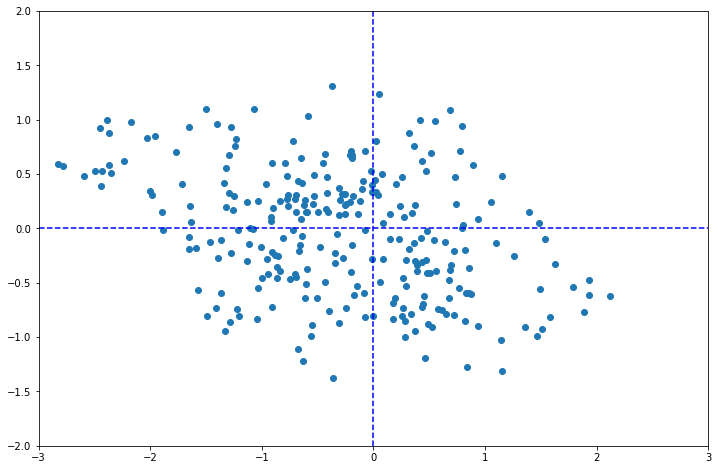

In [114]:
aoJan=era5AO[era5AO.time.dt.month<2]
aoJan


yAllJan=yAll[yAll.time.dt.month<2]
yAllJan['time'] = aoJan.time


euJan=era5EU[era5EU.time.dt.month<2]
aoJanWFD=aoJan[yAllJan>0.44]
euJanWFD=euJan[yAllJan>0.44]
plt.figure(figsize=(12,8))
plt.scatter(aoJanWFD,euJanWFD)
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot((0,0),(-2,2),'b--')
plt.plot((-3,3),(0,0),'b--',)

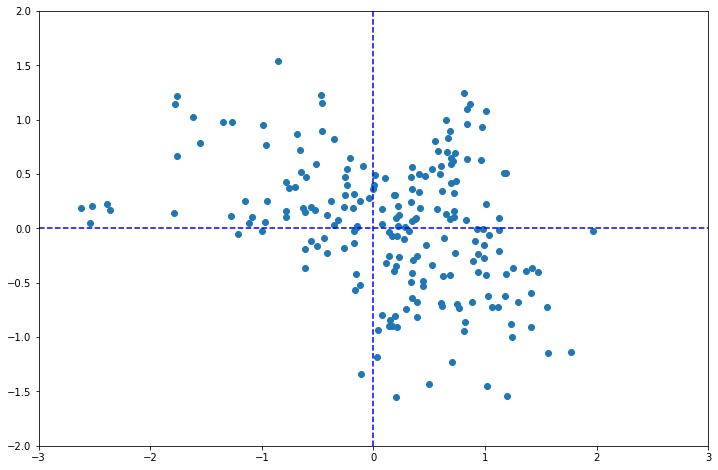

In [113]:
aoFeb=era5AO[era5AO.time.dt.month>11]
yAllFeb=yAll[yAll.time.dt.month>11]
yAllFeb['time'] = aoFeb.time


aoFeb

euFeb=era5EU[era5EU.time.dt.month>11]
aoFebWFD=aoFeb[yAllFeb>0.44]
euFebWFD=euFeb[yAllFeb>0.44]
plt.figure(figsize=(12,8))
plt.scatter(aoFebWFD,euFebWFD)
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot((0,0),(-2,2),'b--')
plt.plot((-3,3),(0,0),'b--',)

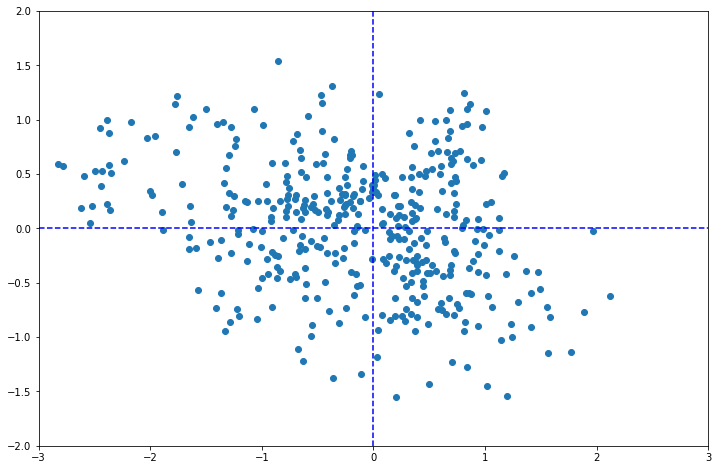

In [118]:
aoAll=era5AO.sel(time=slice('1996-1-1','2014-12-31'))
aoAll


yAllAll=yAll.sel(time=slice('1996-1-1','2014-12-31'))
yAllAll['time'] = aoAll.time


euAll=era5EU.sel(time=slice('1996-1-1','2014-12-31'))
aoAllWFD=aoAll[yAllAll>0.44]
euAllWFD=euAll[yAllAll>0.44]
plt.figure(figsize=(12,8))
plt.scatter(aoAllWFD,euAllWFD)
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot((0,0),(-2,2),'b--')
plt.plot((-3,3),(0,0),'b--',)

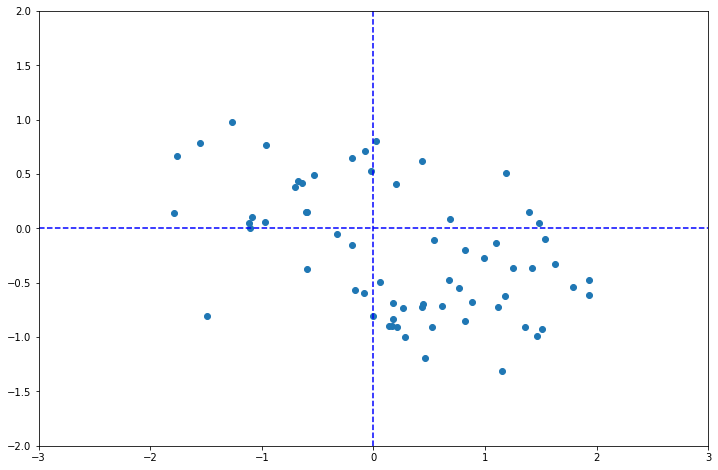

In [119]:
aoAll=era5AO.sel(time=slice('1981-1-1','1995-12-31'))
aoAll


yAllAll=yAll.sel(time=slice('1981-1-1','1995-12-31'))
yAllAll['time'] = aoAll.time


euAll=era5EU.sel(time=slice('1981-1-1','1995-12-31'))
aoAllWFD=aoAll[yAllAll>0.44]
euAllWFD=euAll[yAllAll>0.44]
plt.figure(figsize=(12,8))
plt.scatter(aoAllWFD,euAllWFD)
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot((0,0),(-2,2),'b--')
plt.plot((-3,3),(0,0),'b--',)

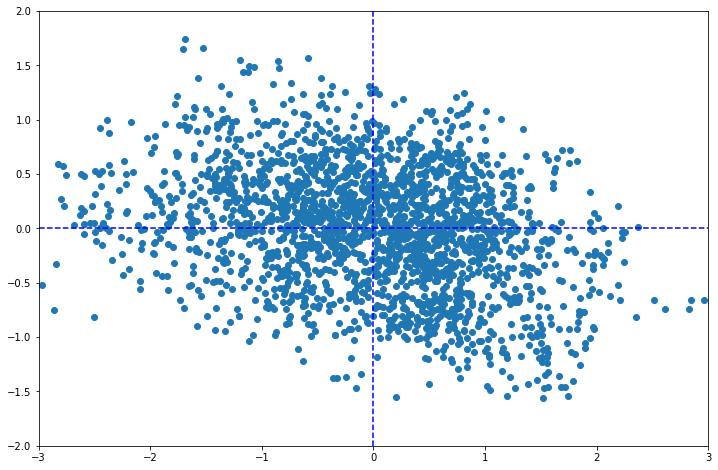

In [117]:
plt.figure(figsize=(12,8))
plt.scatter(era5AO,era5EU)
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot((0,0),(-2,2),'b--')
plt.plot((-3,3),(0,0),'b--',)